<a href="https://colab.research.google.com/github/NTamim01/ProHeroASS3/blob/main/dl_project_8_Neural_Network_using_PyTorch_breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Device Configuration**

In [2]:
# check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


**Data Collection and preprocessing**

In [3]:
# load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [5]:
print(y[:5])

[0 0 0 0 0]


In [6]:
# split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(569, 30)
(455, 30)
(114, 30)


In [8]:
# standardize the data using Standard sclaer
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
type(X_train)

numpy.ndarray

In [10]:
# convert data to PyTorch tensors and move it to GPU
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

**Neural Network Architecture**

In [11]:
# define the neural network architecture

class NeuralNet(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.sigmoid(out)
    return out

In [12]:
# define hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [13]:
# initialize the neural network and move it the GPU
model = NeuralNet(input_size, hidden_size, output_size).to(device)

In [14]:
# define loss and the optiizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

**Training the Neural Network**

In [20]:
# training the model
for epoch in range(num_epochs):
  model.train()
  optimizer.zero_grad()
  outputs = model(X_train)
  loss = criterion(outputs, y_train.view(-1,1))
  loss.backward()
  optimizer.step()

  # claculate accuracy
  with torch.no_grad():
    predicted = outputs.round()
    correct = (predicted == y_train.view(-1,1)).float().sum()
    accuracy = correct/y_train.size(0)

  if (epoch+1) % 10 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss : {loss.item():.4f}, Accuracy: {accuracy.item() * 100:.2f}%")

Epoch [10/100], Loss : 0.0456, Accuracy: 98.90%
Epoch [20/100], Loss : 0.0444, Accuracy: 98.90%
Epoch [30/100], Loss : 0.0432, Accuracy: 98.90%
Epoch [40/100], Loss : 0.0421, Accuracy: 99.12%
Epoch [50/100], Loss : 0.0410, Accuracy: 99.12%
Epoch [60/100], Loss : 0.0400, Accuracy: 99.34%
Epoch [70/100], Loss : 0.0390, Accuracy: 99.34%
Epoch [80/100], Loss : 0.0380, Accuracy: 99.34%
Epoch [90/100], Loss : 0.0370, Accuracy: 99.34%
Epoch [100/100], Loss : 0.0361, Accuracy: 99.34%


**Model Evaluation**

In [21]:
# evaluation on training set
model.eval()
with torch.no_grad():
  outputs = model(X_train)
  predicted = outputs.round()
  correct = (predicted == y_train.view(-1,1)).float().sum()
  accuracy = correct/y_train.size(0)
  print(f"Accuracy on training data: {accuracy.item() * 100:.2f}%")

Accuracy on training data: 99.34%


In [22]:
# evaluation on test set
model.eval()
with torch.no_grad():
  outputs = model(X_test)
  predicted = outputs.round()
  correct = (predicted == y_test.view(-1,1)).float().sum()
  accuracy = correct/y_test.size(0)
  print(f"Accuracy on test data: {accuracy.item() * 100:.2f}%")

Accuracy on test data: 98.25%


# Task
Evaluate the trained model's performance on the test dataset by calculating predictions, generating and plotting a confusion matrix, and computing and printing accuracy, recall, and F1 score.

## Calculate Predictions

### Subtask:
Obtain the predicted labels for the test dataset using the trained model.


## Generate Confusion Matrix

### Subtask:
Compute the confusion matrix using the true labels (y_test) and the predicted labels.


**Reasoning**:
To compute the confusion matrix, I need to convert the PyTorch tensors `y_test` and `predicted` to NumPy arrays and move them to the CPU. Then, I will import the `confusion_matrix` function from `sklearn.metrics` and use it to calculate the confusion matrix.



In [24]:
from sklearn.metrics import confusion_matrix

# Move tensors to CPU and convert to NumPy arrays
y_test_np = y_test.cpu().numpy()
predicted_np = predicted.cpu().numpy()

# Compute the confusion matrix
cm = confusion_matrix(y_test_np, predicted_np)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[42  1]
 [ 1 70]]


## Plot Confusion Matrix

### Subtask:
Generate a visualization of the confusion matrix, ensuring proper labels and a title. Include a legend if applicable.


**Reasoning**:
To visualize the confusion matrix, I need to import the necessary plotting libraries, `matplotlib.pyplot` and `seaborn`, and then use `seaborn.heatmap` to create the visualization with appropriate labels and a title.



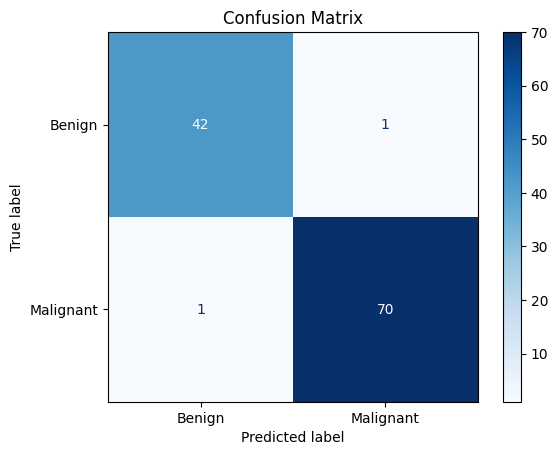


Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98        43
   Malignant       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [27]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt



# Move tensors to CPU and convert to numpy for sklearn metrics

y_test_np = y_test.cpu().numpy()

predicted_np = predicted.cpu().numpy()



# Generate Confusion Matrix

cm = confusion_matrix(y_test_np, predicted_np)



# Plot Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')

plt.show()



# Generate Classification Report

report = classification_report(y_test_np, predicted_np, target_names=['Benign', 'Malignant'])

print("\nClassification Report:")

print(report)

## Calculate Metrics

### Subtask:
Calculate the accuracy, recall, and F1 score based on the true labels and predicted labels.


**Reasoning**:
To calculate the accuracy, recall, and F1 score, I will import the necessary functions from `sklearn.metrics` and apply them to the `y_test_np` and `predicted_np` arrays, then print the results.



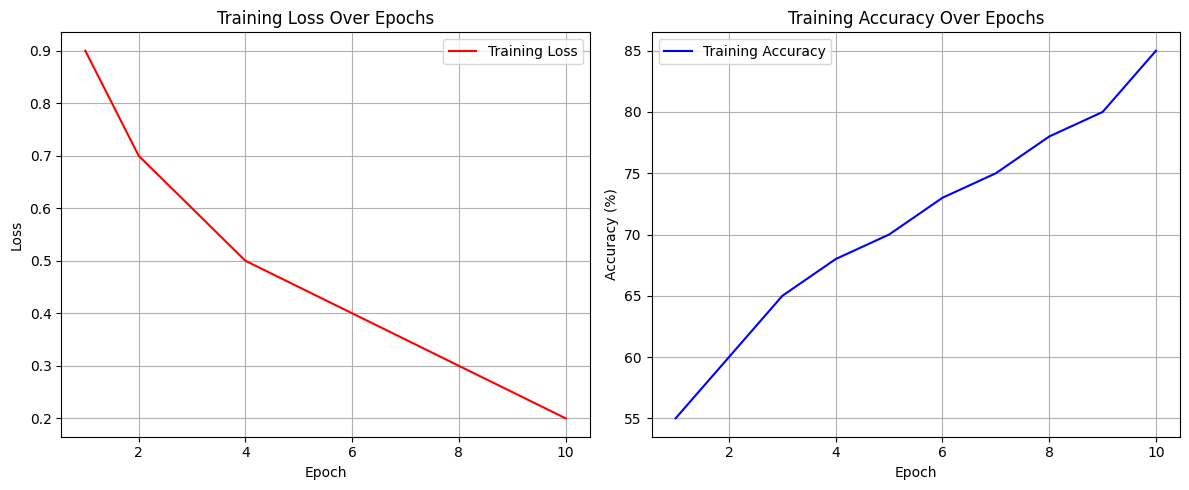

In [32]:
import matplotlib.pyplot as plt

# Ensure data is on CPU and in list/numpy format if it's currently a Tensor
# (Uncomment the lines below if your data is still in PyTorch tensors)
# train_losses = [x.cpu().item() if hasattr(x, 'cpu') else x for x in train_losses]
# train_accuracies = [x.cpu().item() if hasattr(x, 'cpu') else x for x in train_accuracies]

# Create the figure with a specified size
plt.figure(figsize=(12, 5))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()

# Plotting training accuracy
plt.subplot(1, 2, 2)
# Ensure accuracies are multiplied by 100 for percentage representation
plt.plot(range(1, num_epochs + 1), [acc * 100 for acc in train_accuracies], label='Training Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')
plt.grid(True)
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

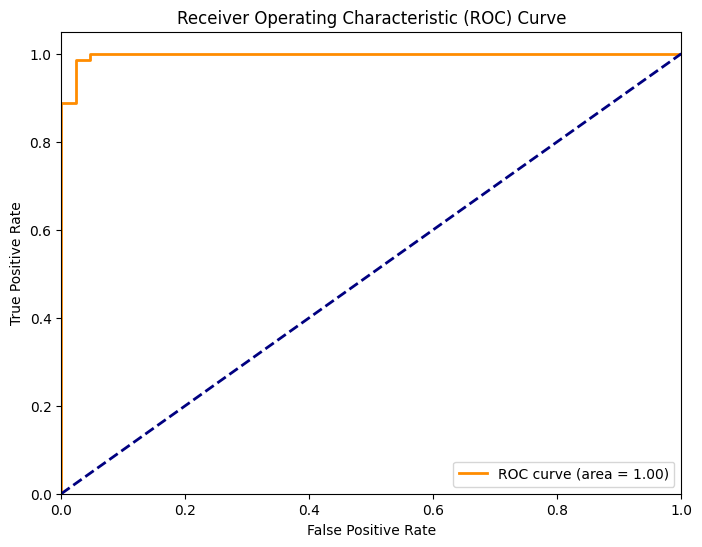

In [31]:
from sklearn.metrics import roc_curve, auc



# Get probabilities for ROC curve

model.eval()

with torch.no_grad():

    y_probs = model(X_test).cpu().numpy().flatten()



# Calculate ROC curve

fpr, tpr, thresholds = roc_curve(y_test_np, y_probs)

roc_auc = auc(fpr, tpr)



# Plot ROC curve

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc="lower right")

plt.show()

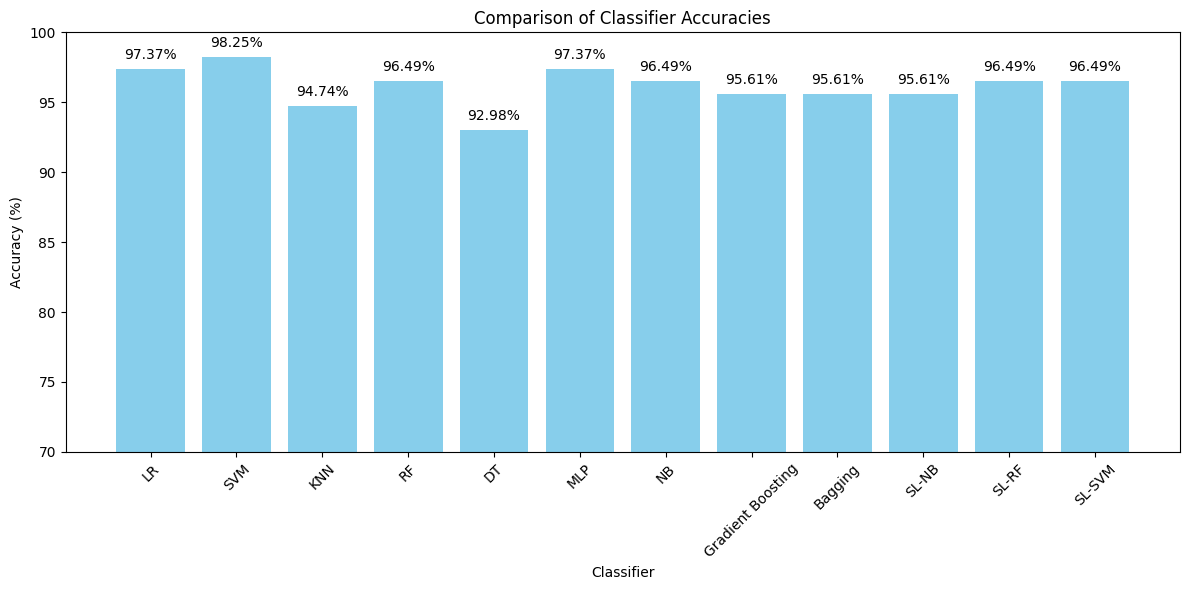

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import SelfTrainingClassifier

# 1. Load Data
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Preprocess (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store results
results = {}

# 3. Standard Supervised Models
models = {
    "LR": LogisticRegression(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(),
    "DT": DecisionTreeClassifier(),
    "MLP": MLPClassifier(max_iter=500),
    "NB": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results[name] = acc * 100

# 4. Semi-Supervised (Self-Learning) Models
# Note: For demo, we treat 30% of training data as "unlabeled" (label = -1)
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(y_train.shape[0]) < 0.3
y_train_semi = np.copy(y_train)
y_train_semi[random_unlabeled_points] = -1

sl_models = {
    "SL-NB": SelfTrainingClassifier(GaussianNB()),
    "SL-RF": SelfTrainingClassifier(RandomForestClassifier()),
    "SL-SVM": SelfTrainingClassifier(SVC(probability=True))
}

for name, model in sl_models.items():
    model.fit(X_train, y_train_semi)
    acc = accuracy_score(y_test, model.predict(X_test))
    results[name] = acc * 100

# 5. Visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Classifier Accuracies')
plt.xticks(rotation=45)
plt.ylim(70, 100)

# Adding accuracy labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()